In [1]:
from SINet import SINet_ResNet50
from data_loader import Dataset


In [2]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.callbacks import ModelCheckpoint
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
from tensorflow.keras.layers import UpSampling2D, Activation
from tensorflow.keras.activations import sigmoid
from keras import optimizers

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
        self.sm_losses = []
        self.im_losses = []
        

    def on_batch_end(self, batch, logs={}):
        if batch % 10 == 0:
          self.losses.append(logs.get('loss'))
          self.sm_losses.append(logs.get('SM_loss'))
          self.im_losses.append(logs.get('IM_loss'))



In [6]:
# Link to the dataset
# https://drive.google.com/drive/folders/1oWRrw0_s6SwtZQDCH05V4z8vAehROmtI?usp=sharing

mini_image_path = '/content/drive/MyDrive/COD10K_mini/mini/Images'
mini_label_path = '/content/drive/MyDrive/COD10K_mini/mini/GT_Objects'

train_image_path = '/content/drive/MyDrive/COD10K-v2/Train/Images'
train_labels_path = '/content/drive/MyDrive/COD10K-v2/Train/Gts'

test_image_path = '/content/drive/MyDrive/COD10K-v2/Test/Images'
test_labels_path = '/content/drive/MyDrive/COD10K-v2/Test/Gts'

In [7]:
datagen = ImageDataGenerator(rescale=1./255)

In [8]:
hyper_batch_size = 3500

In [9]:
train_images_generator = datagen.flow_from_directory(train_image_path, class_mode=None, target_size=(352, 352), batch_size=hyper_batch_size, shuffle=False)
train_labels_generator = datagen.flow_from_directory(train_labels_path, class_mode=None, target_size=(352, 352), batch_size=hyper_batch_size, shuffle=False)

Found 5992 images belonging to 1 classes.
Found 5992 images belonging to 1 classes.


In [10]:
test_images_generator = datagen.flow_from_directory(test_image_path, class_mode=None, target_size=(352, 352), batch_size=12, shuffle=False)
test_labels_generator = datagen.flow_from_directory(test_labels_path, class_mode=None, target_size=(352, 352), batch_size=12, shuffle=False)

Found 3998 images belonging to 1 classes.
Found 3998 images belonging to 1 classes.


In [11]:
print('Loading x')
X = train_images_generator[0]
print('Loading y')
Y = train_labels_generator[0]

Loading x
Loading y


In [12]:
 shuffler = np.random.permutation(hyper_batch_size)

In [13]:
X = X[shuffler]
Y = Y[shuffler]

In [14]:
thresh = hyper_batch_size*3//4

In [15]:
X_train, y_train = X[:thresh], Y[:thresh]
X_val, y_val = X[thresh:], Y[thresh:]

In [16]:
model_checkpoint_callback = ModelCheckpoint(
    filepath='/content/drive/MyDrive/584_models/checkpoints/',
    save_weights_only=True)

opt = optimizers.Adam(learning_rate=1e-4)


In [17]:
m = SINet_ResNet50()

In [18]:
m.compile(optimizer=opt, loss=["binary_crossentropy", "binary_crossentropy"])

In [19]:
loss_history = LossHistory()

In [57]:
# This training is just a demonstration for the project, the real training was made on the entire dataset.

# Train for 40 epochs
h = m.fit(X_train, y_train, epochs=40, batch_size=12, validation_data=(X_val, y_val), callbacks=[loss_history])


Epoch 1/40
219/219 [==============================] - 89s 293ms/step - loss: 0.8404 - SM_loss: 0.4125 - IM_loss: 0.4279 - val_loss: 0.4906 - val_SM_loss: 0.2420 - val_IM_loss: 0.2486
Epoch 2/40
219/219 [==============================] - 57s 262ms/step - loss: 0.5231 - SM_loss: 0.2485 - IM_loss: 0.2746 - val_loss: 0.4561 - val_SM_loss: 0.2290 - val_IM_loss: 0.2272
Epoch 3/40
219/219 [==============================] - 57s 262ms/step - loss: 0.4858 - SM_loss: 0.2445 - IM_loss: 0.2413 - val_loss: 0.4552 - val_SM_loss: 0.2193 - val_IM_loss: 0.2359
Epoch 4/40
219/219 [==============================] - 57s 262ms/step - loss: 0.4699 - SM_loss: 0.2247 - IM_loss: 0.2452 - val_loss: 0.4698 - val_SM_loss: 0.2224 - val_IM_loss: 0.2474
Epoch 5/40
219/219 [==============================] - 57s 261ms/step - loss: 0.4568 - SM_loss: 0.2203 - IM_loss: 0.2365 - val_loss: 0.5215 - val_SM_loss: 0.2118 - val_IM_loss: 0.3098
Epoch 6/40
219/219 [==============================] - 57s 262ms/step - loss: 0.4493 -

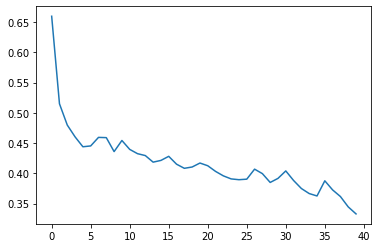

In [58]:
plt.plot(h.history['loss'])

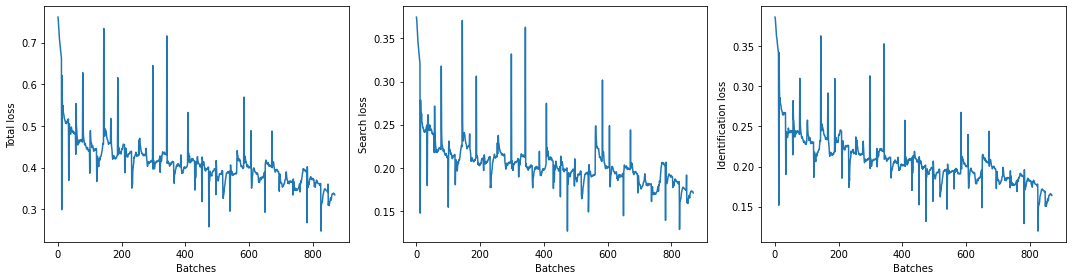

In [61]:
k = 10
s = np.arange(len(loss_history.losses[k:]))

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(4)

plt.subplot(1, 3, 1)

plt.xlabel("Batches")
plt.ylabel('Total loss')
plt.plot(s, loss_history.losses[k:])

plt.subplot(1, 3, 2)

plt.xlabel("Batches")
plt.ylabel('Search loss')
plt.plot(s, loss_history.sm_losses[k:])

plt.subplot(1, 3, 3)

plt.xlabel("Batches")
plt.ylabel('Identification loss')
plt.plot(s, loss_history.im_losses[k:])

plt.tight_layout()



In [62]:
# Train for another 40 epochs
h = m.fit(X_train, y_train, epochs=40, batch_size=12, validation_data=(X_val, y_val), callbacks=[loss_history])


Epoch 1/40
219/219 [==============================] - 57s 262ms/step - loss: 0.3220 - SM_loss: 0.1640 - IM_loss: 0.1581 - val_loss: 0.4349 - val_SM_loss: 0.2117 - val_IM_loss: 0.2232
Epoch 2/40
219/219 [==============================] - 57s 263ms/step - loss: 0.3082 - SM_loss: 0.1574 - IM_loss: 0.1508 - val_loss: 0.4884 - val_SM_loss: 0.2442 - val_IM_loss: 0.2442
Epoch 3/40
219/219 [==============================] - 57s 262ms/step - loss: 0.3502 - SM_loss: 0.1890 - IM_loss: 0.1612 - val_loss: 0.4252 - val_SM_loss: 0.2097 - val_IM_loss: 0.2154
Epoch 4/40
219/219 [==============================] - 57s 262ms/step - loss: 0.3299 - SM_loss: 0.1737 - IM_loss: 0.1562 - val_loss: 0.4345 - val_SM_loss: 0.2168 - val_IM_loss: 0.2177
Epoch 5/40
219/219 [==============================] - 57s 262ms/step - loss: 0.3053 - SM_loss: 0.1619 - IM_loss: 0.1435 - val_loss: 0.4500 - val_SM_loss: 0.2270 - val_IM_loss: 0.2230
Epoch 6/40
219/219 [==============================] - 57s 262ms/step - loss: 0.2939 -

In [82]:
def test_train(m):
    print('Testing a random image from the validation set')
    k = randrange(len(X_train))

    _, cam = m.predict(np.array([X_train[k]]))

    cam = UpSampling2D(size=3, interpolation='bilinear')(cam)
    cam = Activation(sigmoid)(cam)
    cam = cam.numpy().squeeze()
    cam = (cam - cam.min()) / (cam.max() - cam.min() + 1e-8)
    f = plt.figure()
    f.set_figwidth(15)
    f.set_figheight(4)

    plt.subplot(1, 3, 1)
    plt.imshow(X_train[k])

    plt.subplot(1, 3, 2)
    plt.imshow(cam, cmap="gray")

    plt.subplot(1, 3, 3)
    plt.imshow(y_train[k])

    plt.tight_layout()

Testing a random image from the validation set


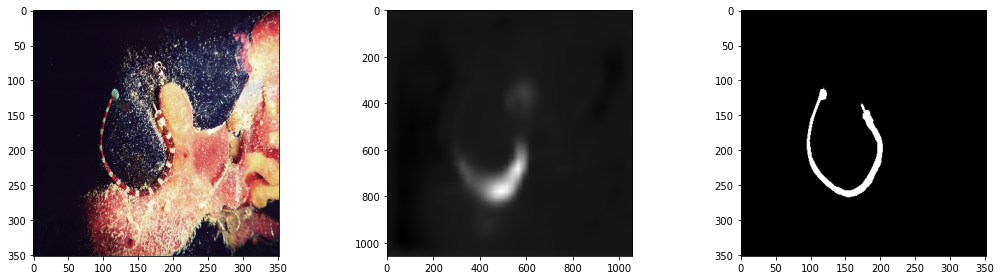

In [66]:
test_train(m)

Testing a random image from the validation set


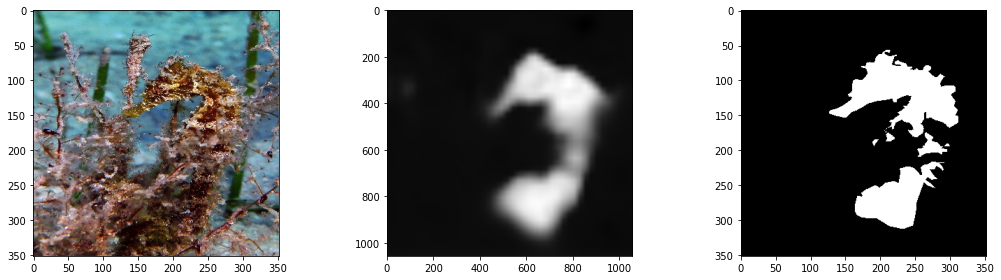

In [80]:
test_train(m)

Testing a random image from the validation set


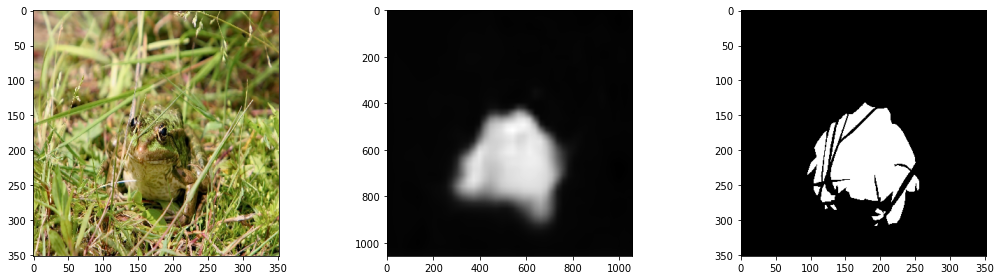

In [83]:
test_train(m)

# Testing

In [36]:
m1 = SINet_ResNet50()
m1.load_weights('/content/drive/MyDrive/584_models/tentative_SINet2.h5')

In [53]:
from random import randrange

In [68]:
def test(m):
    print('Testing a random image from the validation set')
    k = randrange(len(X_val))

    _, cam = m.predict(np.array([X_val[k]]))

    cam = UpSampling2D(size=3, interpolation='bilinear')(cam)
    cam = Activation(sigmoid)(cam)
    cam = cam.numpy().squeeze()
    cam = (cam - cam.min()) / (cam.max() - cam.min() + 1e-8)
    f = plt.figure()
    f.set_figwidth(15)
    f.set_figheight(4)

    plt.subplot(1, 3, 1)
    plt.imshow(X_val[k])

    plt.subplot(1, 3, 2)
    plt.imshow(cam, cmap="gray")

    plt.subplot(1, 3, 3)
    plt.imshow(y_val[k])

    plt.tight_layout()

Testing random image from the validation set


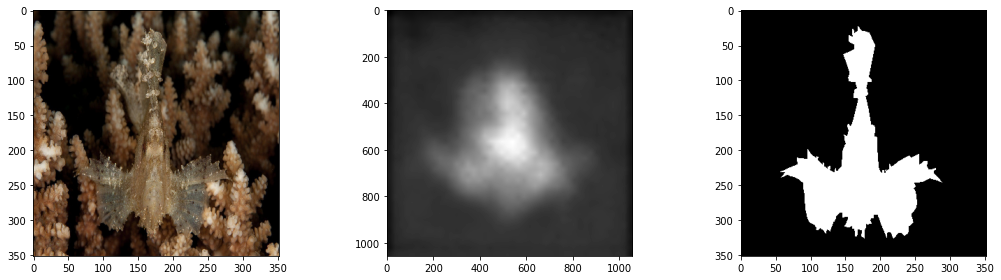

In [55]:
test(m1)

Testing random image from the validation set


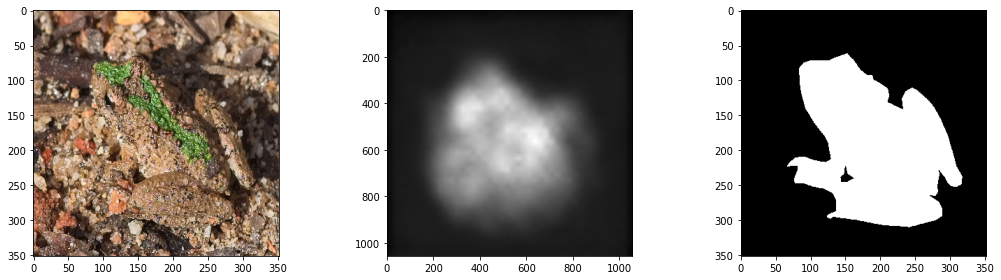

In [49]:
test(m1)

Testing random image from the validation set


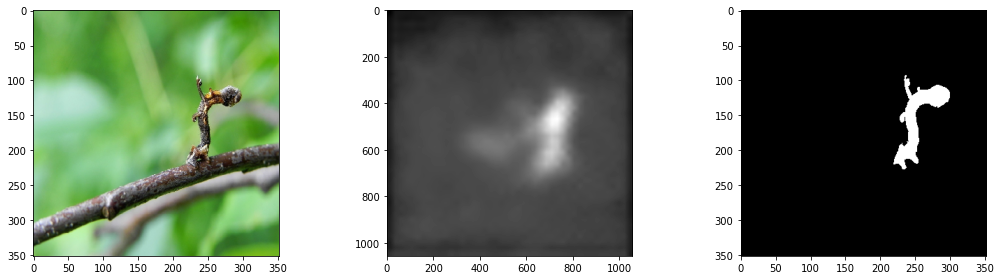

In [52]:
test(m1)